# MNIST Classification - Demo

This notebook demonstrates the performance of three different classification models on the MNIST dataset:
- **Random Forest** - A classic ensemble learning method based on multiple decision trees.
- **Feed-Forward Neural Network (FFNN)** - A simple neural network with multiple hidden layers using ReLU activation and Softmax for classification.
- **Convolutional Neural Network (CNN)** - A deep learning model optimized for image recognition tasks.

We will load the dataset, preprocess it, load pre-trained models, and compare their performance.

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from src.mnist_classifier import MnistClassifier
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import torch

## Load and Prepare Data
We will fetch the MNIST dataset, normalize it, and split it into training and testing sets.

In [21]:
# Load MNIST dataset
mnist = fetch_openml("mnist_784", version=1, parser="pandas")  # Ensure pandas format
X, y = mnist.data, mnist.target.astype(int)

# Convert X to a numpy array to avoid KeyError
X = X.to_numpy()
y = np.array(y)

print("Shape of X:", X.shape)  # Should be (70000, 784)
print("Shape of y:", y.shape)  # Should be (70000,)

Shape of X: (70000, 784)
Shape of y: (70000,)


In [22]:
# Normalize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [23]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select a subset for visualization (only from test data)
X_sample = X_test[:10]
y_sample = y_test[:10]

Initialize three different classifiers for the MNIST dataset

In [ ]:
clf_rf = MnistClassifier("rf")
clf_nn = MnistClassifier("nn")
clf_cnn = MnistClassifier("cnn")

## Load / Train Models
We will now load pre-trained models (or train them if needed).

In [ ]:
clf_rf.model.load_model()
print("✅ RandomForest Model loaded successfully!")

Model loaded from artifacts/models/rf.pkl
✅ RandomForest Model loaded successfully!


In [ ]:
clf_nn.model.load_model()
print("✅ Feed Forward NN Model loaded successfully!")

✅ Model loaded from artifacts/models/ff_nn.pth
✅ Feed Forward NN Model loaded successfully!


In [ ]:
clf_cnn.model.load_model()
print("✅ Convolutional NN Model loaded successfully!")

✅ Model loaded from artifacts/models/cnn.pth
✅ Convolutional NN Model loaded successfully!


Instead of loading the models, you can train them yourself, but this will take some time.
For this, uncomment the code cell below and run it.

In [ ]:
# clf_rf.train(X_train, y_train)
# clf_nn.train(X_train, y_train)
# clf_cnn.train(X_train, y_train)

✅ Random Forest model trained successfully!


## Model Predictions
After loading the trained models, the next step is to test their performance on unseen data. We will use the first 10 images from the test set (X_test[:10]) and pass them through each of the three models

In [27]:
# Make predictions
predictions_rf = clf_rf.predict(X_test)

In [28]:
predictions_nn = clf_nn.predict(X_test)

In [29]:
predictions_cnn = clf_cnn.predict(X_test)

## Visualizing Model Predictions
Visual comparison of predictions made by the three models: Random Forest (rf), Feed-Forward Neural Network (nn), and Convolutional Neural Network (cnn).
We can visually compare how each model performs on the same test images.

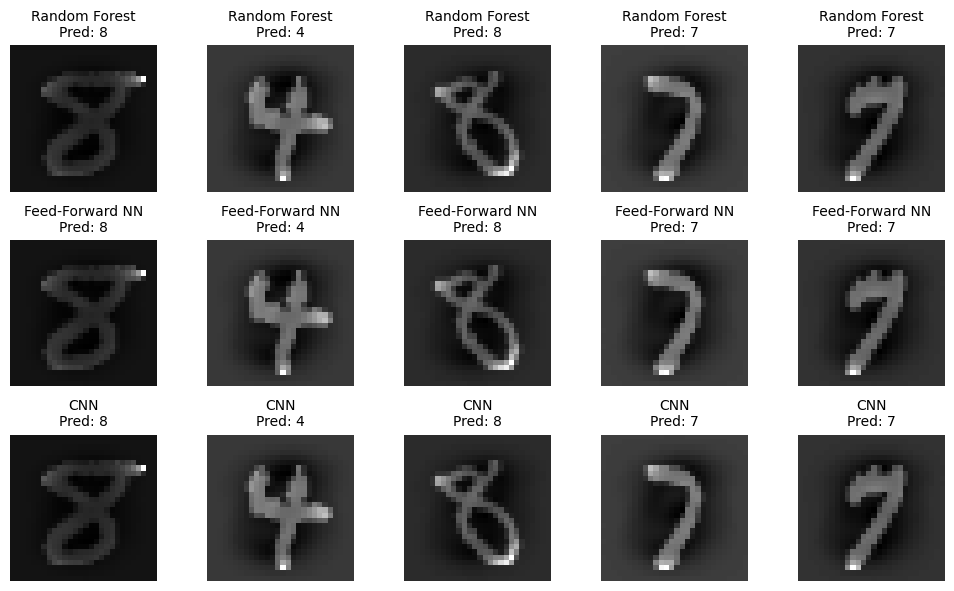

In [30]:
fig, axes = plt.subplots(3, 5, figsize=(10, 6))  
model_names = ["Random Forest", "Feed-Forward NN", "CNN"]
predictions = [predictions_rf, predictions_nn, predictions_cnn]

for row, (model_name, preds) in enumerate(zip(model_names, predictions)):
    for col, ax in enumerate(axes[row]):
        ax.imshow(X_sample[col].reshape(28, 28), cmap="gray")
        ax.set_title(f"{model_name}\nPred: {preds[col]}", fontsize=10)
        ax.axis("off")

plt.tight_layout()
plt.show()

## Accuracy Computation
In this section, we evaluate the classification accuracy of each model on the test dataset using the accuracy score metric.
The accuracy score is a common evaluation metric for classification models. It measures the proportion of correctly predicted instances out of the total number of instances in the dataset.
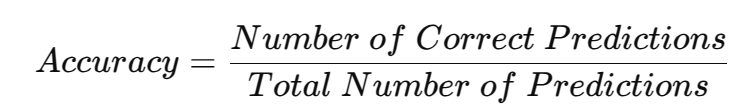

In [31]:
# Compute accuracy
accuracy_rf = accuracy_score(y_test, predictions_rf)
print(f"✅ Accuracy RandomForestClassifier: {accuracy_rf:.4f}")

accuracy_nn = accuracy_score(y_test, predictions_nn)
print(f"✅ Accuracy FeedForwardNNClassifier: {accuracy_nn:.4f}")

accuracy_cnn = accuracy_score(y_test, predictions_cnn)
print(f"✅ Accuracy CNNClassifier: {accuracy_cnn:.4f}")

✅ Accuracy RandomForestClassifier: 0.9679
✅ Accuracy FeedForwardNNClassifier: 0.9641
✅ Accuracy CNNClassifier: 0.9872


#### F1-Score (Harmonic Mean of Precision & Recall)
The F1-score is the harmonic mean of precision and recall, providing a balanced metric that considers both false positives (FP) and false negatives (FN). It is especially useful when you need a metric that balances precision and recall.

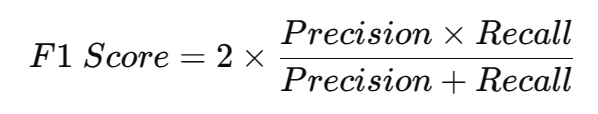
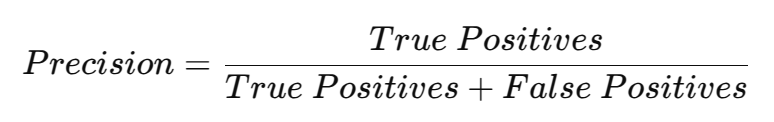
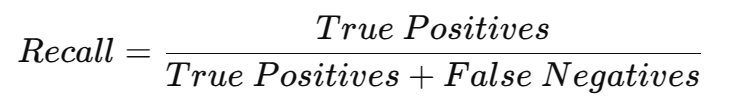

In [32]:
from sklearn.metrics import f1_score

# Compute F1-Score for each model
f1_rf = f1_score(y_test, predictions_rf, average="weighted")
f1_nn = f1_score(y_test, predictions_nn, average="weighted")
f1_cnn = f1_score(y_test, predictions_cnn, average="weighted")

# Print results
print(f"✅ F1-Score RandomForestClassifier: {f1_rf:.4f}")
print(f"✅ F1-Score FeedForwardNNClassifier: {f1_nn:.4f}")
print(f"✅ F1-Score CNNClassifier: {f1_cnn:.4f}")


✅ F1-Score RandomForestClassifier: 0.9679
✅ F1-Score FeedForwardNNClassifier: 0.9640
✅ F1-Score CNNClassifier: 0.9872


📌 Conclusion
In this notebook, we explored three different models for classifying handwritten digits from the MNIST dataset:

**✅ Random Forest** – A traditional ensemble learning method that performs reasonably well but struggles with complex image patterns.  
**✅ Feed-Forward Neural Network (FFNN)** – A simple deep learning model that improves accuracy by learning hierarchical patterns in the data.  
**✅ Convolutional Neural Network (CNN)** – The most powerful model for image classification, achieving the highest accuracy due to its ability to extract spatial features effectively.